In [1]:
import sys
sys.path.append("/home/federico/Desktop/University/CM/")


from Network import NR, NC
import utils as utils
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, train_test_split

In [2]:
def plot_MONK_stats(conf, dataset, test, X_train, y_train, X_test, y_test, save=False, time=True):
    print(conf[dataset][test])
    
    if dataset == 'cup':
        net = NR(**conf[dataset][test])
    else:
        net = NC(**conf[dataset][test])

    net.fit(X_train, y_train, test_data=(X_test, y_test))
    net.plot_results(f"{dataset}_{test}_loss", score=False, save=save)
    net.plot_results(f"{dataset}_{test}_loss", score=False, save=save, time=time)
    net.plot_results(f"{dataset}_{test}_score", score=True, save=save)
    net.plot_results(f"{dataset}_{test}_score", score=True, save=save, time=time)

    net.plot_grad(f"{dataset}_{test}", save=save)
    print(net.best_score())

In [3]:
datasets = {
    'cup': '../../data/ML-CUP20-TR.csv',
    'monk1': '../../data/monks-1',
    'monk2': '../../data/monks-2', 
    'monk3': '../../data/monks-3', 
}


# TODO: aggiungere json di configurazione
params = {
    'cup': {
        'SGD': {
            'batch_size': 32,
            'epochs': 1000,
            'eps': 1e-4,
            'eta': 0.001,
            'lmbda': 0.001,
            'momentum': 0.,
            'optimizer': "SGD",
            'sizes': [30, 50],
            'activation': 'Lrelu',
            'debug': True,
        },
        'SGM': {
            'batch_size': 32,
            'epochs': 1000,
            'eps':1e-4,
            'eta': 0.1,
            'lmbda': 0.001,
            'optimizer': "SGM",
            'sizes': [30, 50],
            'activation': 'Lrelu',
            'debug': True,
        }
    },
    'monk1': {
        'SGD': {
            'activation': 'Lrelu',
            'batch_size': 10,
            'epochs': 1000,
            'eps': 1e-4,
            'eta': 0.1,
            'lmbda': 0.0001,
            'momentum': 0.9,
            'optimizer': "SGD",
            'sizes': [5],
            'debug': True
        },
        'SGM': {
            'batch_size': 10,
            'epochs': 1000,
            'eps':1e-3,
            'eta': 0.1,
            'lmbda': 0.001,
            'optimizer': "SGM",
            'sizes': [5],
            'debug': True
        }
    },
    'monk2': {
        'SGD': {
            'activation': 'Lrelu',
            'batch_size': 10,
            'epochs': 500,
            'eps': 1e-4,
            'eta': 0.1,
            'lmbda': 0.0001,
            'momentum': 0.9,
            'optimizer': "SGD",
            'sizes': [3],
            'debug': True
        },
        'SGM': {
            'batch_size': 10,
            'epochs': 500,
            'eps':1e-3,
            'eta': 0.1,
            'lmbda': 0.,
            'optimizer': "SGM",
            'sizes': [3],
            'debug': True,
        }
    },
    'monk3': {
        'SGD': {
            'activation': 'Lrelu',
            'batch_size': 10,
            'epochs': 500,
            'eps': 1e-4,
            'eta': 0.01,
            'lmbda': 0.0001,
            'momentum': 0.5,
            'optimizer': "SGD",
            'sizes': [5],
            'debug': True
        },
        'SGM': {
            'batch_size': 32,
            'epochs': 500,
            'eps':1e-3,
            'eta': 0.1,
            'lmbda': 0.01,
            'optimizer': "SGM",
            'sizes': [2],
            'debug': True,
        }
    }
}

In [4]:
test = "SGM"
dataset = "cup"

if dataset == 'cup':
    X_train, X_test, y_train, y_test = utils.load_CUP(datasets[dataset], split=0.2)
    nn = NR
else:
    X_train, X_test, y_train, y_test = utils.load_monk(datasets[dataset])
    nn = NC
    
net = nn(**params[dataset][test])

1       || Gradient norm: 4.04619e+02 || Loss: 2.13172e+01, 2.18771e+01 || Score: 0.713, 0.719
2       || Gradient norm: 3.13035e+02 || Loss: 1.58792e+01, 1.60508e+01 || Score: 0.782, 0.788
3       || Gradient norm: 2.80334e+02 || Loss: 1.27860e+01, 1.28630e+01 || Score: 0.822, 0.828
4       || Gradient norm: 2.67308e+02 || Loss: 1.06986e+01, 1.06825e+01 || Score:  0.85, 0.855
5       || Gradient norm: 2.76201e+02 || Loss: 9.31119e+00, 9.20297e+00 || Score: 0.868, 0.874
6       || Gradient norm: 2.96032e+02 || Loss: 8.28503e+00, 8.12655e+00 || Score: 0.882, 0.888
7       || Gradient norm: 2.92884e+02 || Loss: 7.53115e+00, 7.31296e+00 || Score: 0.892, 0.898
8       || Gradient norm: 2.93366e+02 || Loss: 6.99429e+00, 6.69697e+00 || Score: 0.899, 0.906
9       || Gradient norm: 2.91379e+02 || Loss: 6.58153e+00, 6.23599e+00 || Score: 0.904, 0.913
10      || Gradient norm: 2.91818e+02 || Loss: 6.27087e+00, 5.87927e+00 || Score: 0.909, 0.918
11      || Gradient norm: 2.92992e+02 || Loss: 6.0

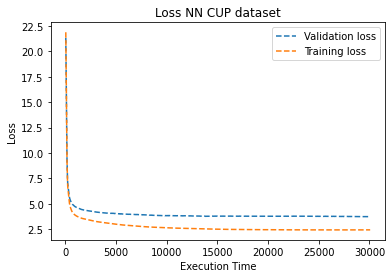

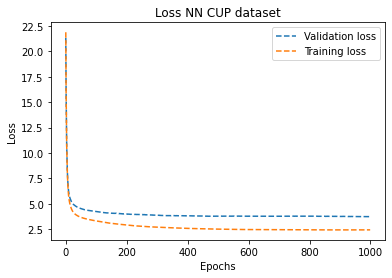

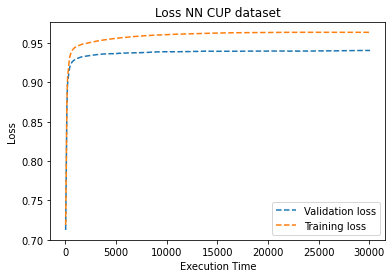

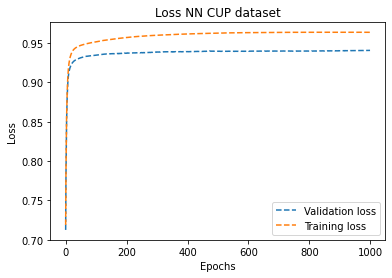

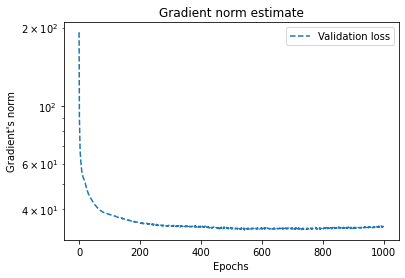

ep: 1000    | s: [] | b: 32 | e:  0.1 | lmbda:0.001 | m:  0.0
Grad: 1.81346e+02 | Loss: 3.74531e+00, 2.45059e+00 | Score: 0.941, 0.964
ended in: 30073.571, avg per ep: 30.073571
total update: 22.952, avg updt: 0.022952
total ff: 41000, total ff time: 9074.975000001137, avg ff: 0.22134085365856432
total bp: 39000, total bp time: 12592.865000000298, avg bp: 0.322893974358982
total ev: 1000, total ev time: 7222.213999999994, avg ev: 7.222213999999994




<Figure size 432x288 with 0 Axes>

In [5]:
net.fit(X_train, y_train, test_data=(X_test, y_test))

net.plot_results(f"{dataset}_{test}", score=False, time=True)
net.plot_results(f"{dataset}_{test}", score=False, time=False)
net.plot_results(f"{dataset}_{test}", score=True, time=True)
net.plot_results(f"{dataset}_{test}", score=True, time=False)
net.plot_grad(f"{dataset}_{test}")

print(net.best_score(name=f"{dataset}_{test}", save=False))

# Report stats

{'activation': 'Lrelu', 'batch_size': 10, 'epochs': 1000, 'eps': 0.0001, 'eta': 0.1, 'lmbda': 0.0001, 'momentum': 0.9, 'optimizer': 'SGD', 'sizes': [5], 'debug': False}
ep: 1000    | s: [] | b: 10 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 5.32437e-04 | Loss: -1.00000e+00, 5.14932e-08 | Score:    -1, 1    
ended in: 2222.295, avg per ep: 2.222295
total update: 1.961, avg updt: 0.001961
total ff: 14000, total ff time: 455.25099999993927, avg ff: 0.032517928571424236
total bp: 13000, total bp time: 586.0910000000141, avg bp: 0.04508392307692416
total ev: 1000, total ev time: 117.30499999999998, avg ev: 0.11730499999999998

 

{'batch_size': 10, 'epochs': 1000, 'eps': 0.001, 'eta': 0.1, 'lmbda': 0.001, 'optimizer': 'SGM', 'sizes': [5], 'debug': False}
ep: 1000    | s: [] | b: 10 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 5.32437e-04 | Loss: -1.00000e+00, 5.14932e-08 | Score:    -1, 1    
ended in: 2222.295, avg per ep: 2.222295
total update: 1.961, avg updt: 0.001961
total ff: 14000, total ff

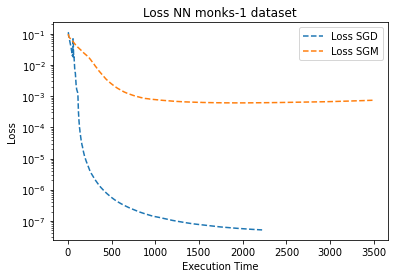

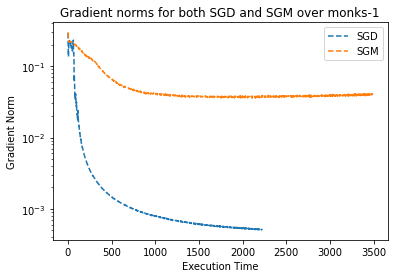

<Figure size 432x288 with 0 Axes>

In [4]:
time = True
score = False

dataset = 'monks-1'
X_train, y_train, X_test, y_test = load_dataset(dataset)

if dataset == 'cup':
    nn = NR
else:
    nn = NC

# Plots together results from SGD and SGM
net_SGD = nn(**params[dataset]['SGD'])
net_SGM = nn(**params[dataset]['SGM'])

net_SGD.fit(X_train, y_train)
net_SGM.fit(X_train, y_train)

sgd_loss = net_SGD.train_loss
sgm_loss = net_SGM.train_loss

# Conditional configuration
x_label = 'Execution Time' if time else 'Epochs'

train_res_SGD = net_SGD.train_scores if score else net_SGD.train_loss
train_res_SGM = net_SGM.train_scores if score else net_SGM.train_loss
x_SGD = net_SGD.epochs_time if time else list(range(len(train_res_SGD)))
x_SGM = net_SGM.epochs_time if time else list(range(len(train_res_SGM)))

print(params[dataset]['SGD'])
print(net_SGD.best_score(),"\n")

print(params[dataset]['SGM'])
print(net_SGD.best_score(),"\n")

# Plots losses
plt.semilogy(x_SGD, train_res_SGD, '--', label='Loss SGD')
plt.semilogy(x_SGM, train_res_SGM, '--', label='Loss SGM')

plt.xlabel(x_label)
plt.ylabel ('Loss')

plt.legend(loc='best')
plt.title (f'Loss NN {dataset} dataset')

plt.show()
plt.clf()

# Plots gradient norms
plt.semilogy(x_SGD, net_SGD.grad_est_per_epoch, '--', label='SGD')
plt.semilogy(x_SGM, net_SGM.grad_est_per_epoch, '--', label='SGM')

plt.xlabel(x_label)
plt.ylabel ('Gradient Norm')

plt.legend(loc='best')
plt.title (f'Gradient norms for both SGD and SGM over {dataset}')

plt.show()
plt.clf()


# MONK statistics

In [5]:
X_train_monk1, y_train_monk1, X_test_monk1, y_test_monk1 = load_dataset('monks-1')
X_train_monk2, y_train_monk2, X_test_monk2, y_test_monk2 = load_dataset('monks-2')
X_train_monk3, y_train_monk3, X_test_monk3, y_test_monk3 = load_dataset('monks-3')

## MONK1

### Best grid execution

{'activation': 'Lrelu', 'batch_size': 10, 'epochs': 1000, 'eps': 0.0001, 'eta': 0.1, 'lmbda': 0.0001, 'momentum': 0.9, 'optimizer': 'SGD', 'sizes': [5], 'debug': False}


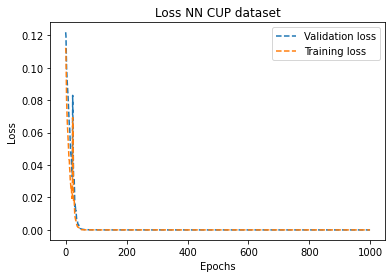

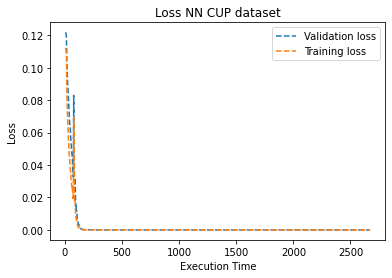

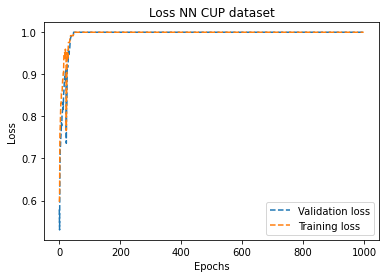

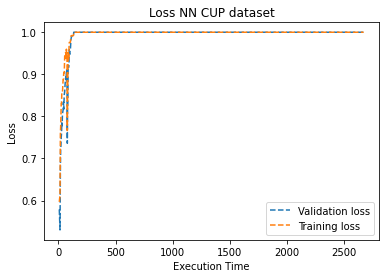

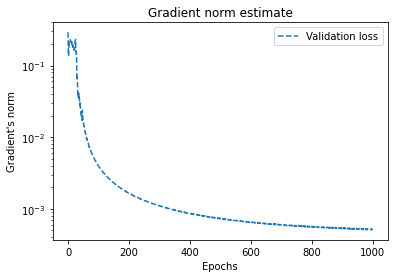

ep: 1000    | s: [] | b: 10 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 5.32437e-04 | Loss: 1.28983e-07, 5.14932e-08 | Score:     1, 1    
ended in: 2671.184, avg per ep: 2.6711840000000002
total update: 2.08, avg updt: 0.0020800000000000003
total ff: 15000, total ff time: 617.6759999999185, avg ff: 0.04117839999999457
total bp: 13000, total bp time: 652.3840000000014, avg bp: 0.05018338461538472
total ev: 1000, total ev time: 299.2070000000004, avg ev: 0.2992070000000004




<Figure size 432x288 with 0 Axes>

In [6]:
plot_MONK_stats(params, "monks-1", "SGD", X_train_monk1, y_train_monk1, X_test_monk1, y_test_monk1)

{'batch_size': 10, 'epochs': 1000, 'eps': 0.001, 'eta': 0.1, 'lmbda': 0.001, 'optimizer': 'SGM', 'sizes': [5], 'debug': False}


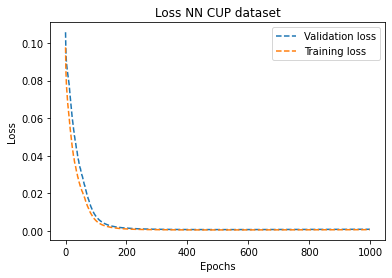

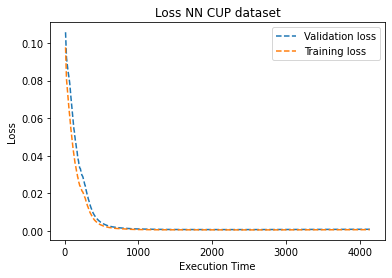

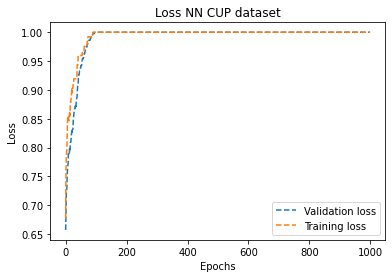

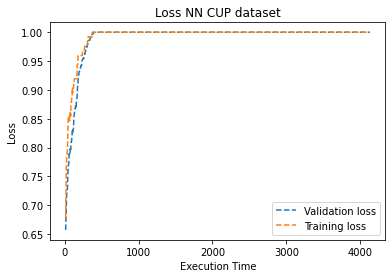

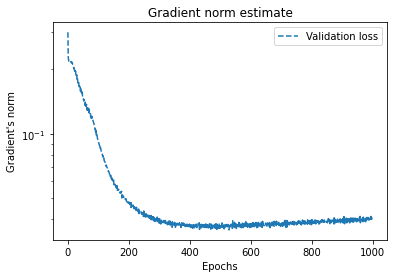

ep: 1000    | s: [] | b: 10 | e:  0.1 | lmbda:0.001 | m:  0.5
Grad: 4.79977e-02 | Loss: 7.85140e-04, 6.08881e-04 | Score:     1, 1    
ended in: 4133.849, avg per ep: 4.1338490000000006
total update: 3.436, avg updt: 0.003436
total ff: 15000, total ff time: 632.5600000000073, avg ff: 0.042170666666667155
total bp: 13000, total bp time: 1970.3060000001128, avg bp: 0.1515620000000087
total ev: 1000, total ev time: 285.19600000000133, avg ev: 0.28519600000000134




<Figure size 432x288 with 0 Axes>

In [7]:
plot_MONK_stats(params, "monks-1", "SGM", X_train_monk1, y_train_monk1, X_test_monk1, y_test_monk1)


### Specified precision comparison

In [9]:
dataset = 'monks-1'
test_SGD = "SGD"
test_SGM = "SGM"

conf = params.copy()
conf[dataset][test_SGD]['eps'] = 5e-4
conf[dataset][test_SGM]['eps'] = 5e-4

conf[dataset][test_SGD]['epochs'] = 5000
conf[dataset][test_SGM]['epochs'] = 5000

conf[dataset][test_SGD]['batch_size'] = None
conf[dataset][test_SGM]['batch_size'] = None


{'activation': 'Lrelu', 'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.1, 'lmbda': 0.0001, 'momentum': 0.9, 'optimizer': 'SGD', 'sizes': [5], 'debug': False}
0.0004999695077498215 0.0005
Reached desired precision in gradient norm, stopping.


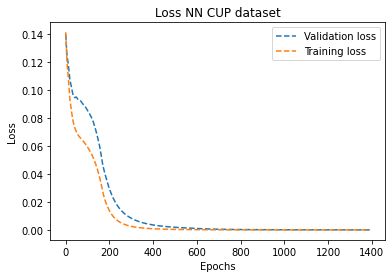

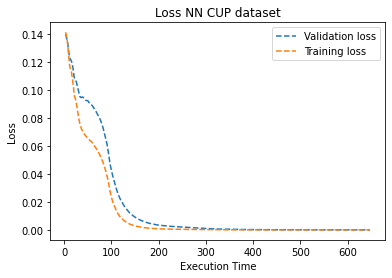

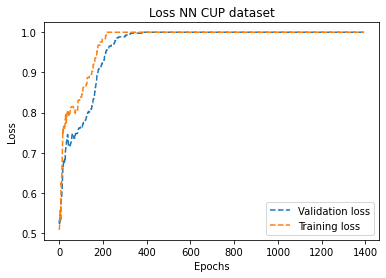

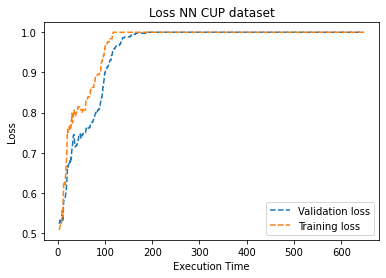

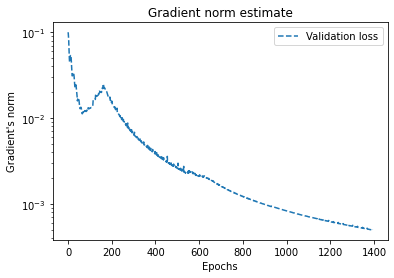

ep: 5000    | s: [] | b: 124 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 4.99970e-04 | Loss: 3.68464e-05, 5.14856e-06 | Score:     1, 1    
ended in: 647.613, avg per ep: 0.12952260000000002
total update: 0.179, avg updt: 3.5799999999999996e-05
total ff: 4179, total ff time: 216.62400000000298, avg ff: 0.05183632447954127
total bp: 1393, total bp time: 87.13700000000114, avg bp: 0.06255348169418602
total ev: 1393, total ev time: 320.24899999999934, avg ev: 0.22989877961234698




<Figure size 432x288 with 0 Axes>

In [10]:
plot_MONK_stats(conf, dataset, test_SGD, X_train_monk1, y_train_monk1, X_test_monk1, y_test_monk1)

{'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.1, 'lmbda': 0.001, 'optimizer': 'SGM', 'sizes': [5], 'debug': False}
SGM - grad:0.0004796509638954897, eps: 0.0005
Reached desired precision in gradient norm, stopping.


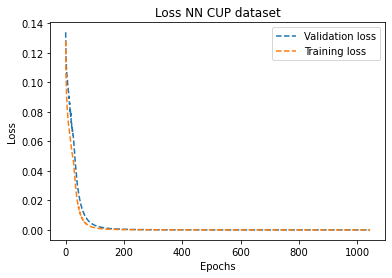

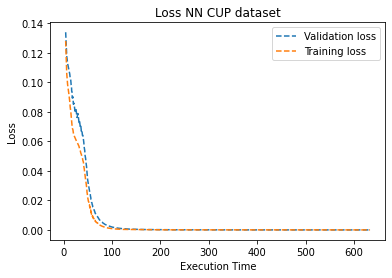

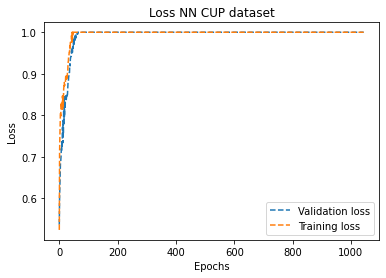

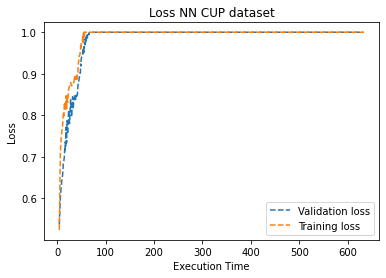

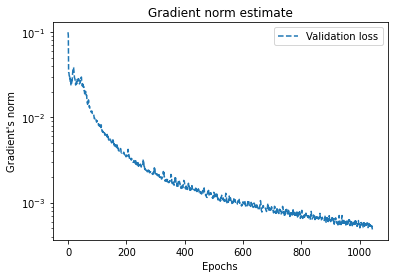

ep: 5000    | s: [] | b: 124 | e:  0.1 | lmbda:0.001 | m:  0.5
Grad: 4.79651e-04 | Loss: 4.71163e-06, 2.13997e-06 | Score:     1, 1    
ended in: 632.861, avg per ep: 0.1265722
total update: 0.275, avg updt: 5.5e-05
total ff: 3135, total ff time: 174.0409999999967, avg ff: 0.05551547049441681
total bp: 1045, total bp time: 180.27999999999994, avg bp: 0.1725167464114832
total ev: 1045, total ev time: 255.22699999999813, avg ev: 0.24423636363636184




<Figure size 432x288 with 0 Axes>

In [11]:
plot_MONK_stats(conf, dataset, test_SGM, X_train_monk1, y_train_monk1, X_test_monk1, y_test_monk1)

## MONK2

### Best grid execution

{'activation': 'Lrelu', 'batch_size': 10, 'epochs': 500, 'eps': 0.0001, 'eta': 0.1, 'lmbda': 0.0001, 'momentum': 0.9, 'optimizer': 'SGD', 'sizes': [3], 'debug': False}


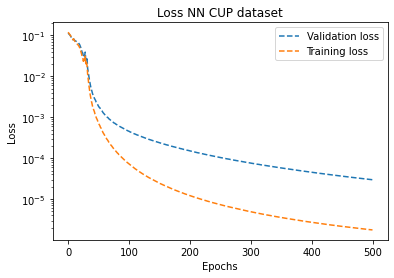

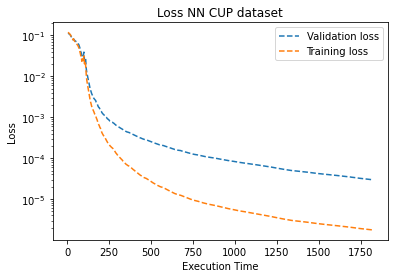

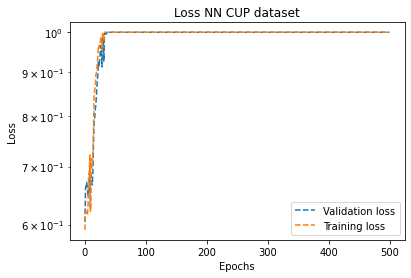

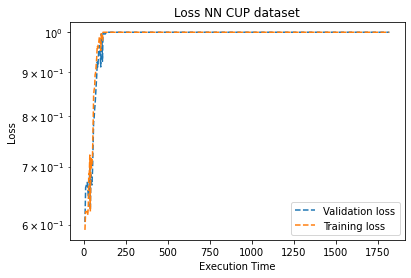

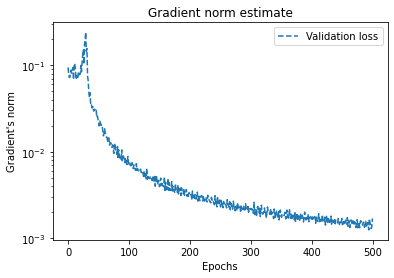

ep: 500     | s: [3] | b: 10 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 2.91090e-03 | Loss: 2.97697e-05, 1.76808e-06 | Score:     1, 1    
ended in: 1820.345, avg per ep: 3.64069
total update: 3.332, avg updt: 0.006664
total ff: 9500, total ff time: 462.4389999999953, avg ff: 0.048677789473683716
total bp: 8500, total bp time: 506.95799999999855, avg bp: 0.05964211764705865
total ev: 500, total ev time: 173.7079999999999, avg ev: 0.34741599999999984




<Figure size 432x288 with 0 Axes>

In [10]:
plot_MONK_stats(params, "monk2", "SGD", X_train_monk2, y_train_monk2, X_test_monk2, y_test_monk2)

{'batch_size': 10, 'epochs': 500, 'eps': 0.001, 'eta': 0.1, 'lmbda': 0.0, 'optimizer': 'SGM', 'sizes': [3], 'debug': False}


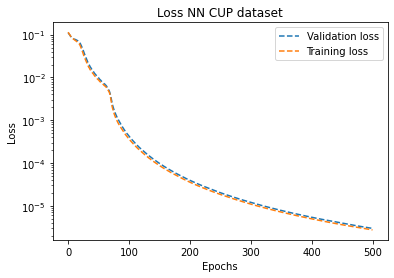

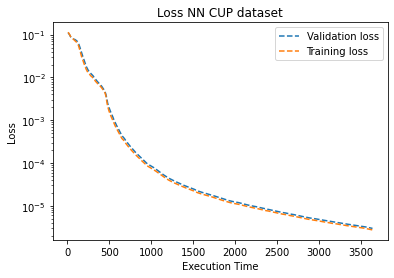

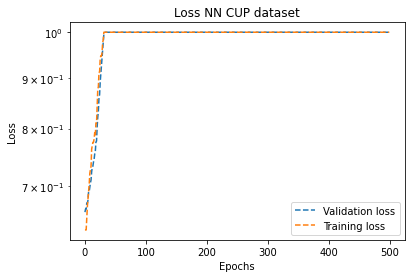

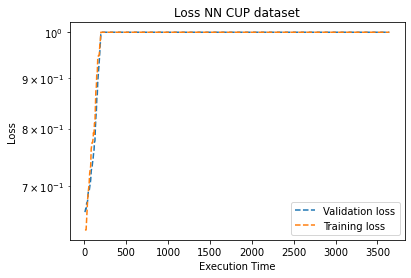

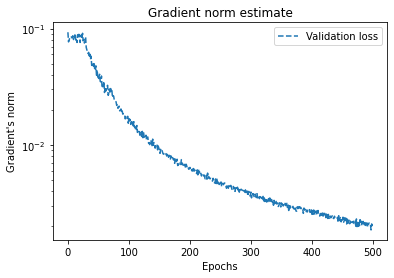

ep: 500     | s: [3] | b: 10 | e:  0.1 | lmbda:  0.0 | m:  0.5
Grad: 2.36891e-03 | Loss: 2.96746e-06, 2.73439e-06 | Score:     1, 1    
ended in: 3642.2619999999997, avg per ep: 7.284523999999999
total update: 5.251, avg updt: 0.010502000000000001
total ff: 9500, total ff time: 567.9950000000017, avg ff: 0.05978894736842123
total bp: 8500, total bp time: 1837.9020000000025, avg bp: 0.21622376470588264
total ev: 500, total ev time: 198.80000000000004, avg ev: 0.39760000000000006




<Figure size 432x288 with 0 Axes>

In [11]:
plot_MONK_stats(params, "monk2", "SGM", X_train_monk2, y_train_monk2, X_test_monk2, y_test_monk2)


### Specified precision

In [12]:
dataset = 'monk2'
test_SGD = "SGD"
test_SGM = "SGM"

conf = params.copy()
conf[dataset][test_SGD]['eps'] = 5e-4
conf[dataset][test_SGM]['eps'] = 5e-4

conf[dataset][test_SGD]['epochs'] = 5000
conf[dataset][test_SGM]['epochs'] = 5000

conf[dataset][test_SGD]['batch_size'] = None
conf[dataset][test_SGM]['batch_size'] = None


{'activation': 'Lrelu', 'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.1, 'lmbda': 0.0001, 'momentum': 0.9, 'optimizer': 'SGD', 'sizes': [3], 'debug': False}
Reached desired precision in gradient norm, stopping.


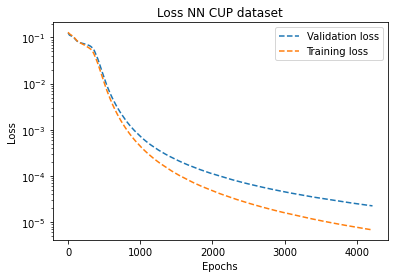

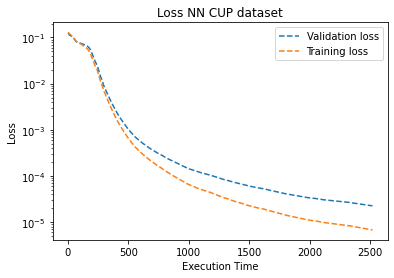

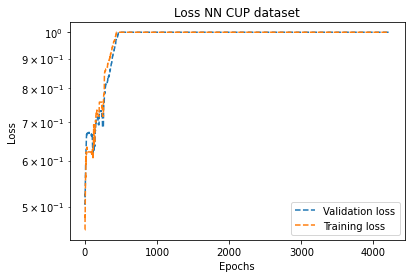

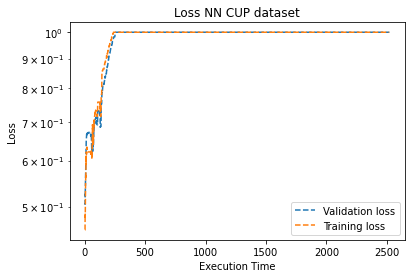

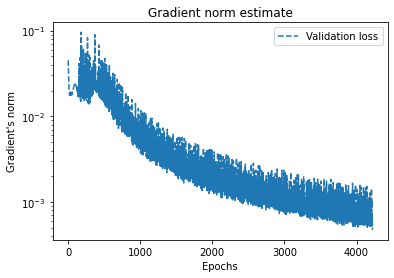

ep: 5000    | s: [3] | b: 169 | e:  0.1 | lmbda:0.0001 | m:  0.9
Grad: 4.74175e-04 | Loss: 2.24929e-05, 6.77436e-06 | Score:     1, 1    
ended in: 2521.378, avg per ep: 0.5042756
total update: 0.195, avg updt: 3.9e-05
total ff: 12663, total ff time: 934.9850000000087, avg ff: 0.07383597883597952
total bp: 4221, total bp time: 398.2040000000025, avg bp: 0.09433878227908138
total ev: 4221, total ev time: 1339.788000000002, avg ev: 0.3174100923951675




<Figure size 432x288 with 0 Axes>

In [13]:
plot_MONK_stats(conf, dataset, test_SGD, X_train_monk2, y_train_monk2, X_test_monk2, y_test_monk2)

{'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.1, 'lmbda': 0.0, 'optimizer': 'SGM', 'sizes': [3], 'debug': False}
Reached desired precision in gradient norm, stopping.


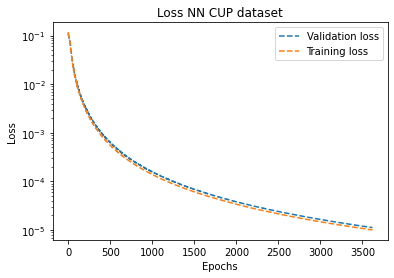

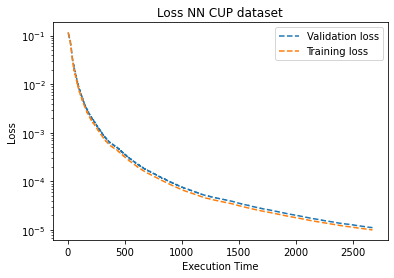

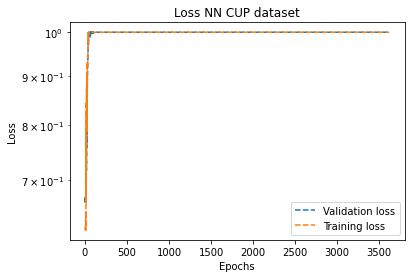

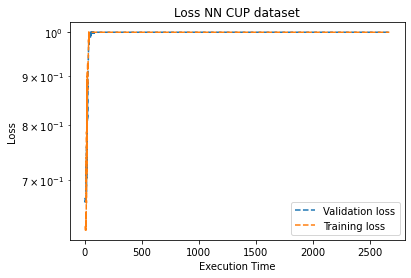

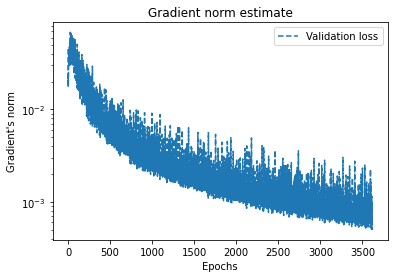

ep: 5000    | s: [3] | b: 169 | e:  0.1 | lmbda:  0.0 | m:  0.5
Grad: 4.97250e-04 | Loss: 1.12146e-05, 1.00688e-05 | Score:     1, 1    
ended in: 2672.114, avg per ep: 0.5344228
total update: 0.604, avg updt: 0.0001208
total ff: 10860, total ff time: 763.1009999999959, avg ff: 0.07026712707182282
total bp: 3620, total bp time: 830.9390000000013, avg bp: 0.22954116022099486
total ev: 3620, total ev time: 1100.5279999999957, avg ev: 0.3040132596685071




<Figure size 432x288 with 0 Axes>

In [14]:
plot_MONK_stats(conf, dataset, test_SGM, X_train_monk2, y_train_monk2, X_test_monk2, y_test_monk2)

## MONK3

### Best grid execution

{'activation': 'Lrelu', 'batch_size': 10, 'epochs': 500, 'eps': 0.0001, 'eta': 0.01, 'lmbda': 0.0001, 'momentum': 0.5, 'optimizer': 'SGD', 'sizes': [5], 'debug': False}


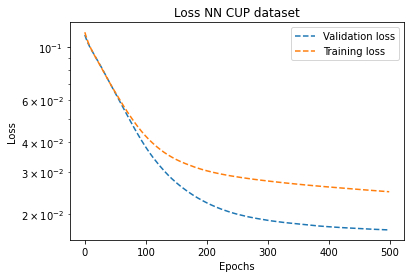

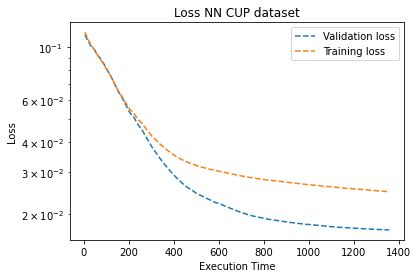

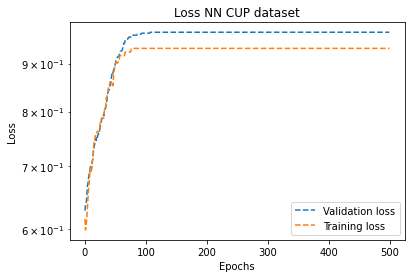

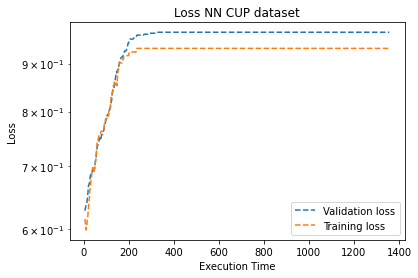

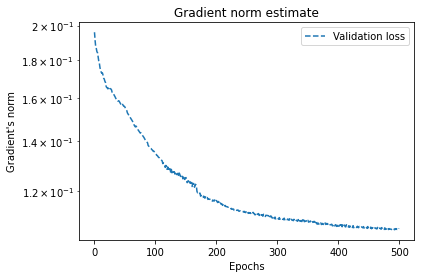

ep: 500     | s: [5] | b: 10 | e: 0.01 | lmbda:0.0001 | m:  0.5
Grad: 4.67238e-02 | Loss: 1.72087e-02, 2.48524e-02 | Score: 0.972, 0.934
ended in: 1357.033, avg per ep: 2.714066
total update: 2.679, avg updt: 0.005358
total ff: 7500, total ff time: 355.55899999999536, avg ff: 0.04740786666666605
total bp: 6500, total bp time: 368.7199999999975, avg bp: 0.05672615384615347
total ev: 500, total ev time: 166.22700000000003, avg ev: 0.3324540000000001




<Figure size 432x288 with 0 Axes>

In [15]:
plot_MONK_stats(params, "monk3", "SGD", X_train_monk3, y_train_monk3, X_test_monk3, y_test_monk3)

{'batch_size': 32, 'epochs': 500, 'eps': 0.001, 'eta': 0.1, 'lmbda': 0.01, 'optimizer': 'SGM', 'sizes': [2], 'debug': False}


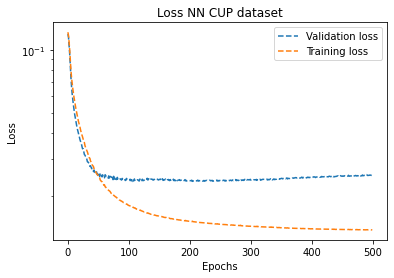

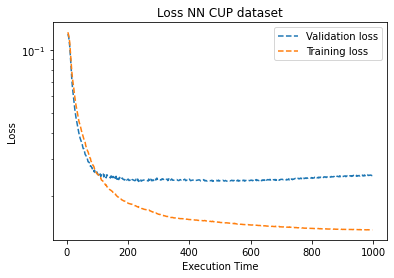

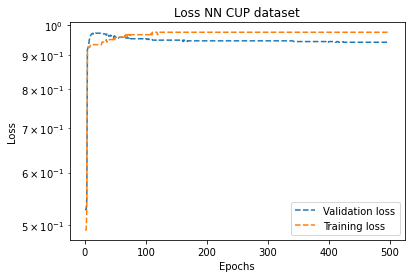

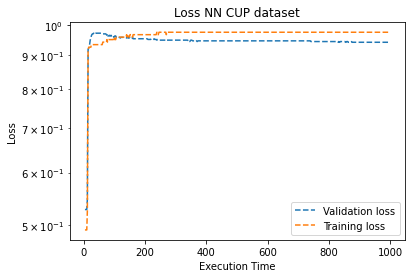

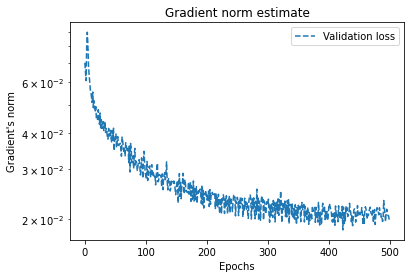

ep: 500     | s: [2] | b: 32 | e:  0.1 | lmbda: 0.01 | m:  0.5
Grad: 1.36338e-02 | Loss: 2.33998e-02, 1.77201e-02 | Score: 0.972, 0.934
ended in: 997.119, avg per ep: 1.994238
total update: 1.757, avg updt: 0.0035139999999999998
total ff: 3000, total ff time: 192.24399999999994, avg ff: 0.06408133333333331
total bp: 2000, total bp time: 437.2829999999999, avg bp: 0.21864149999999996
total ev: 500, total ev time: 170.40700000000012, avg ev: 0.34081400000000023




<Figure size 432x288 with 0 Axes>

In [16]:
plot_MONK_stats(params, "monk3", "SGM", X_train_monk3, y_train_monk3, X_test_monk3, y_test_monk3)


### Specified precision

In [28]:
dataset = 'monk3'
test_SGD = "SGD"
test_SGM = "SGM"

conf = params.copy()
conf[dataset][test_SGD]['eps'] = 5e-4
conf[dataset][test_SGM]['eps'] = 5e-4

conf[dataset][test_SGD]['epochs'] = 5000
conf[dataset][test_SGM]['epochs'] = 5000

conf[dataset][test_SGD]['batch_size'] = None
conf[dataset][test_SGM]['batch_size'] = None


{'activation': 'Lrelu', 'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.01, 'lmbda': 0.0001, 'momentum': 0.5, 'optimizer': 'SGD', 'sizes': [5], 'debug': False}


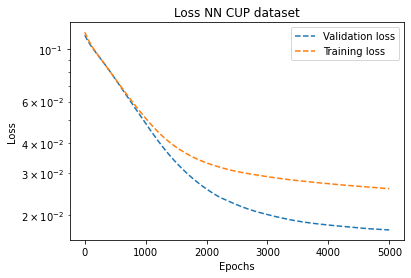

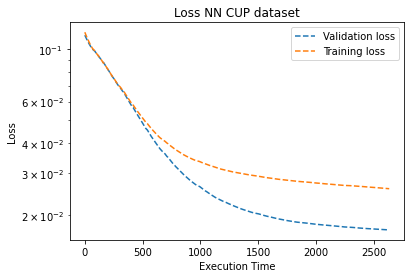

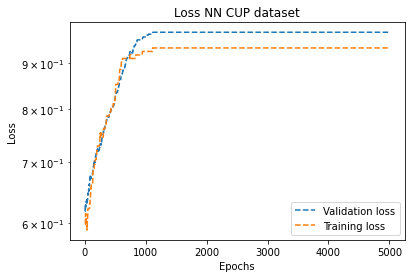

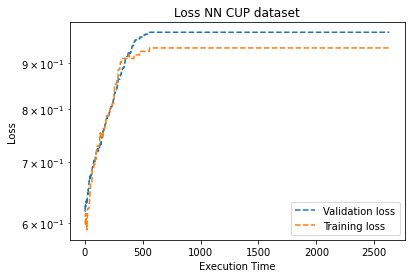

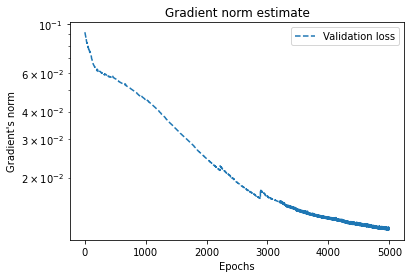

ep: 5000    | s: [5] | b: 122 | e: 0.01 | lmbda:0.0001 | m:  0.5
Grad: 1.15798e-02 | Loss: 1.72884e-02, 2.57781e-02 | Score: 0.972, 0.934
ended in: 2629.64, avg per ep: 0.525928
total update: 0.188, avg updt: 3.76e-05
total ff: 15000, total ff time: 995.20199999999, avg ff: 0.06634679999999933
total bp: 5000, total bp time: 406.45999999999793, avg bp: 0.08129199999999959
total ev: 5000, total ev time: 1407.3660000000068, avg ev: 0.28147320000000137




<Figure size 432x288 with 0 Axes>

In [29]:
plot_MONK_stats(conf, dataset, test_SGD, X_train_monk3, y_train_monk3, X_test_monk3, y_test_monk3)

{'batch_size': None, 'epochs': 5000, 'eps': 0.0005, 'eta': 0.1, 'lmbda': 0.01, 'optimizer': 'SGM', 'sizes': [2], 'debug': False}


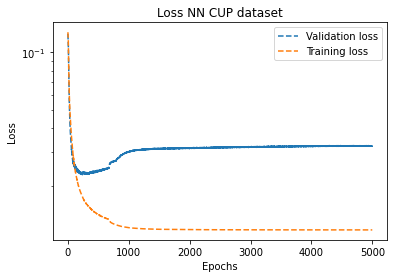

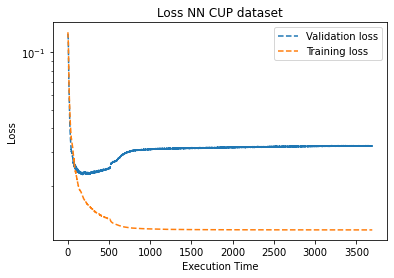

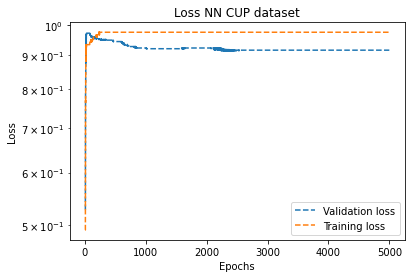

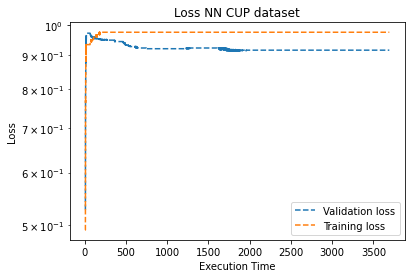

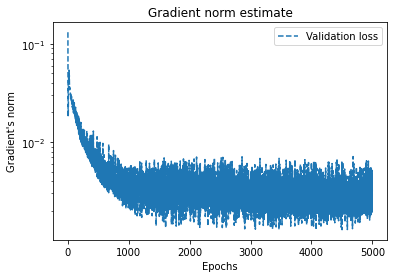

ep: 5000    | s: [2] | b: 122 | e:  0.1 | lmbda: 0.01 | m:  0.5
Grad: 3.25650e-03 | Loss: 2.29573e-02, 1.77270e-02 | Score: 0.972, 0.934
ended in: 3693.109, avg per ep: 0.7386218
total update: 0.387, avg updt: 7.74e-05
total ff: 15000, total ff time: 996.7440000000249, avg ff: 0.06644960000000166
total bp: 5000, total bp time: 1131.174999999999, avg bp: 0.2262349999999998
total ev: 5000, total ev time: 1534.544, avg ev: 0.30690880000000004




<Figure size 432x288 with 0 Axes>

In [22]:
plot_MONK_stats(conf, dataset, test_SGM, X_train_monk3, y_train_monk3, X_test_monk3, y_test_monk3)

# CUP statistics

### Best grid execution

{'batch_size': 32, 'epochs': 1000, 'eps': 0.0001, 'eta': 0.001, 'lmbda': 0.001, 'momentum': 0.0, 'optimizer': 'SGD', 'sizes': [30, 50], 'activation': 'Lrelu', 'debug': False}


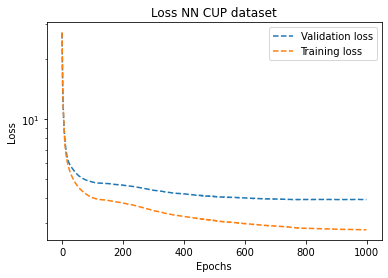

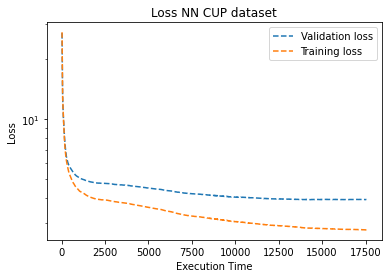

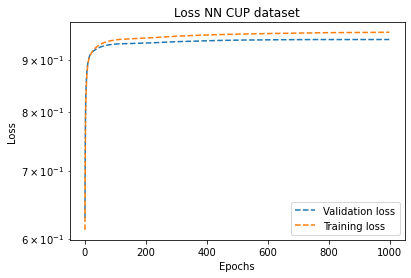

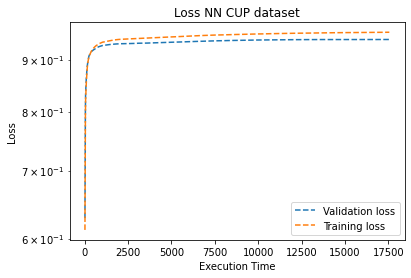

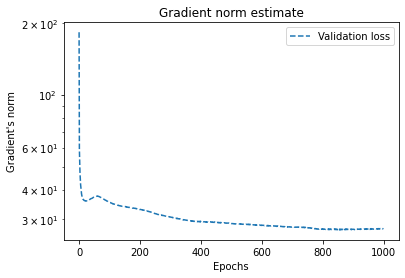

ep: 1000    | s: [30, 50] | b: 32 | e:0.001 | lmbda:0.001 | m:  0.0
Grad: 3.75936e+01 | Loss: 3.93305e+00, 2.84479e+00 | Score: 0.942, 0.958
ended in: 17550.97, avg per ep: 17.55097
total update: 10.212, avg updt: 0.010212
total ff: 36000, total ff time: 6162.255000000557, avg ff: 0.17117375000001547
total bp: 34000, total bp time: 5137.253999999834, avg bp: 0.15109570588234808
total ev: 1000, total ev time: 3797.071000000004, avg ev: 3.797071000000004




<Figure size 432x288 with 0 Axes>

In [38]:
plot_MONK_stats(params, "cup", "SGD", X_train, y_train, X_test, y_test)

{'batch_size': 32, 'epochs': 1000, 'eps': 0.001, 'eta': 0.1, 'lmbda': 0.001, 'optimizer': 'SGM', 'sizes': [30, 50], 'activation': 'Lrelu', 'debug': False}


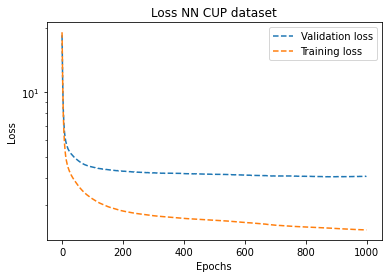

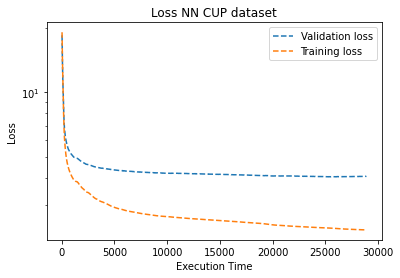

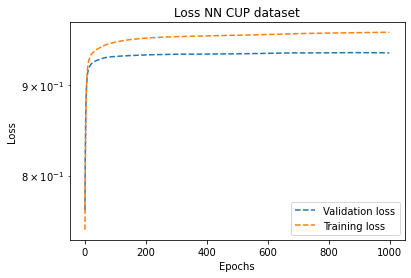

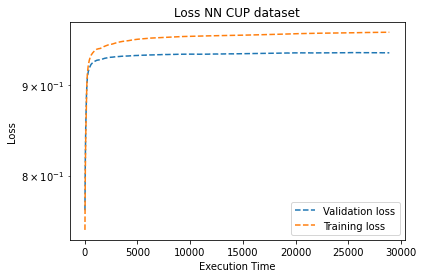

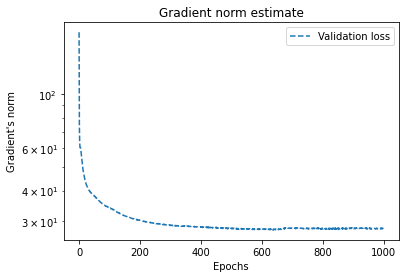

ep: 1000    | s: [30, 50] | b: 32 | e:  0.1 | lmbda:0.001 | m:  0.0
Grad: 4.06527e+01 | Loss: 4.05387e+00, 2.34248e+00 | Score:  0.94, 0.964
ended in: 28889.19, avg per ep: 28.88919
total update: 27.449, avg updt: 0.027449
total ff: 36000, total ff time: 6028.263000000105, avg ff: 0.16745175000000292
total bp: 34000, total bp time: 14804.139999999823, avg bp: 0.435415882352936
total ev: 1000, total ev time: 3681.8500000000063, avg ev: 3.681850000000006




<Figure size 432x288 with 0 Axes>

In [37]:
plot_MONK_stats(params, "cup", "SGM", X_train, y_train, X_test, y_test)